# <p style="text-align: center;">Restaurant Recommender System Using ML </p>

In [62]:
# Importing Data processing libraries
import pandas as pd
import numpy as np
import scipy.stats

# Importing Visualization Library
import seaborn as sns

In [63]:
# Read in data for restaurnat ratings and review the data
ratings=pd.read_csv("E:\\Data Analytics stuff\\Project files\\DS - Recommender Model\\Restaurants\\new_ratings.csv")
ratings.head()

,userID,RID,value
0,1.0,1.0,5.0
1,2.0,1.0,NaN
2,3.0,1.0,NaN
3,4.0,1.0,NaN
4,5.0,1.0,4.0


In [4]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userID  791013 non-null  float64
 1   RID     791013 non-null  float64
 2   value   229140 non-null  float64
dtypes: float64(3)
memory usage: 24.0 MB


In [10]:
# Number of users
print('The ratings dataset has', ratings['userID'].nunique(), 'unique users')

# Number of Restaurants
print('The ratings dataset has', ratings['RID'].nunique(), 'unique restaurants')

# Number of ratings
print('The ratings dataset has', ratings['value'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['value'].unique()))

The ratings dataset has 602 unique users
The ratings dataset has 1314 unique restaurants
The ratings dataset has 5 unique ratings
The unique ratings are [5.0, nan, 1.0, 2.0, 3.0, 4.0]


In [64]:
# Read in the restaurants data
restaurants = pd.read_csv("E:\Data Analytics stuff\Project files\DS - Recommender Model\Restaurants\Restaurant Names.xlsx.csv")
restaurants.head()

,RID,rname,cuisine
0,1,AB FOODS POINT,"Beverages,Pizzas"
1,2,Janta Sweet House,"Sweets,Bakery"
2,3,theka coffee desi,Beverages
3,4,Singh Hut,"Fast Food,Indian"
4,5,GRILL MASTERS,"Italian-American,Fast Food"


In [65]:
# Merge ratings and restaurants datasets
df = pd.merge(ratings, restaurants, on='RID', how='inner')
df.head()

,userID,RID,value,rname,cuisine
0,1.0,1.0,5.0,AB FOODS POINT,"Beverages,Pizzas"
1,2.0,1.0,NaN,AB FOODS POINT,"Beverages,Pizzas"
2,3.0,1.0,NaN,AB FOODS POINT,"Beverages,Pizzas"
3,4.0,1.0,NaN,AB FOODS POINT,"Beverages,Pizzas"
4,5.0,1.0,4.0,AB FOODS POINT,"Beverages,Pizzas"


In [14]:
# Aggregate by restaurants
agg_ratings = df.groupby('rname').agg(mean_rating = ('value', 'mean'),
                                                number_of_ratings = ('value', 'count')).reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rname              1277 non-null   object 
 1   mean_rating        1277 non-null   float64
 2   number_of_ratings  1277 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 39.9+ KB


In [68]:
#CHech the mean rating count for the restaurants for statistical significance
agg_ratings.describe()

,mean_rating,number_of_ratings
count,1277.000000,1277.000000
mean,2.996325,179.436179
std,0.103609,36.588987
min,2.622093,140.000000
25%,2.929348,167.000000
50%,3.000000,174.000000
75%,3.065476,182.000000
max,3.305732,563.000000


In [24]:
# Keep only restaurants with over 180 ratings(mean rating count)
agg_ratings_GT180 = agg_ratings[agg_ratings['number_of_ratings']>180]
agg_ratings_GT180.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 1275
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rname              372 non-null    object 
 1   mean_rating        372 non-null    float64
 2   number_of_ratings  372 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 11.6+ KB


In [25]:
# Check popular restaurants
agg_ratings_GT180.sort_values(by='number_of_ratings', ascending=False).head()

,rname,mean_rating,number_of_ratings
571,KFC,3.014210,563
949,Saffron,2.971326,558
437,Grameen Kulfi,2.988889,540
1049,Subway,3.026769,523
211,Cafe Coffee Day,3.001949,513


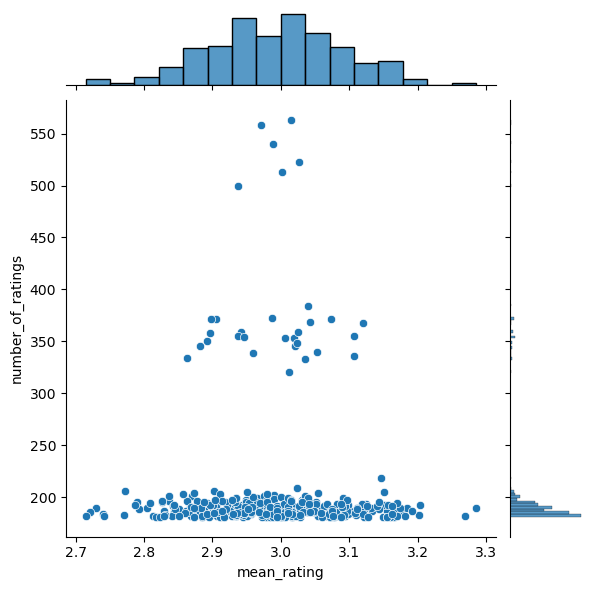

In [20]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

To keep only the restaurants with more than 180 ratings, we need to join the restaurants with the user-rating level dataframe.

how='inner' and on='title' ensure that only the restaurants with more than 100 ratings are included.

In [26]:
# Merge data
df_GT180 = pd.merge(df, agg_ratings_GT180[['rname']], on='rname', how='inner')
df_GT180.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246218 entries, 0 to 246217
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userID   246218 non-null  float64
 1   RID      246218 non-null  float64
 2   value    76265 non-null   float64
 3   rname    246218 non-null  object 
 4   cuisine  246218 non-null  object 
dtypes: float64(3), object(2)
memory usage: 11.3+ MB


In [31]:
# Number of users
print('The ratings dataset has', df_GT180['userID'].nunique(), 'unique users')

# Number of Restaurants
print('The ratings dataset has', df_GT180['RID'].nunique(), 'unique restaurants')

# Number of ratings
print('The ratings dataset has', df_GT180['value'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df_GT180['value'].unique()))

The ratings dataset has 602 unique users
The ratings dataset has 409 unique restaurants
The ratings dataset has 5 unique ratings
The unique ratings are [5.0, nan, 1.0, 2.0, 3.0, 4.0]


In [32]:
# Create user-item matrix
matrix = df_GT180.pivot_table(index='userID', columns='rname', values='value')
matrix.head()

rname,3 Peg Restro & Bar,33 The Eatery,8AM TIFFINS,A One Pani Puri,A1 Paratha House,AADD M AADD B,AAVYA HOME FOOD,AB FOODS POINT,AGRA TIKKA'S & KEBAB'S,AMRITA FAST FOOD CENTRE,...,Winnie the Pooh Cafe and Cooking School,Wok Palace,Yummerica Fries,ZAAFFRAN RESTAURANT,Zandoor,Zen Cafe,mann ki chai,only idlis,puny bUNy,theka coffee desi
userID,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,...,5.0,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN
3.0,1.0,NaN,NaN,3.0,1.0,4.0,NaN,NaN,4.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
4.0,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,3.0,2.0,...,3.0,2.0,NaN,NaN,NaN,NaN,5.0,1.0,2.0,2.0
5.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,1.0,4.0,...,NaN,NaN,NaN,NaN,3.0,4.0,4.0,NaN,NaN,5.0


In [33]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

rname,3 Peg Restro & Bar,33 The Eatery,8AM TIFFINS,A One Pani Puri,A1 Paratha House,AADD M AADD B,AAVYA HOME FOOD,AB FOODS POINT,AGRA TIKKA'S & KEBAB'S,AMRITA FAST FOOD CENTRE,...,Winnie the Pooh Cafe and Cooking School,Wok Palace,Yummerica Fries,ZAAFFRAN RESTAURANT,Zandoor,Zen Cafe,mann ki chai,only idlis,puny bUNy,theka coffee desi
userID,,,,,,,,,,,,,,,,,,,,,
1.0,-2.119403,NaN,NaN,1.880597,NaN,NaN,NaN,1.880597,NaN,1.880597,...,1.880597,NaN,1.880597,NaN,NaN,-1.119403,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,1.062500,NaN,NaN,NaN,NaN,NaN,...,-1.937500,NaN,NaN,0.0625,NaN,NaN,1.062500,NaN,NaN,NaN
3.0,-1.995968,NaN,NaN,0.004032,-1.995968,1.004032,NaN,NaN,1.004032,-1.995968,...,-1.995968,NaN,NaN,NaN,NaN,NaN,NaN,2.004032,NaN,NaN
4.0,NaN,1.839286,NaN,NaN,NaN,NaN,0.839286,NaN,-0.160714,-1.160714,...,-0.160714,-1.160714,NaN,NaN,NaN,NaN,1.839286,-2.160714,-1.160714,-1.160714
5.0,1.092308,NaN,NaN,-1.907692,NaN,NaN,NaN,1.092308,-1.907692,1.092308,...,NaN,NaN,NaN,NaN,0.092308,1.092308,1.092308,NaN,NaN,2.092308


In [42]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
userID,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,-0.138813,0.213212,-0.111300,0.079236,-0.079442,-0.239596,-0.055978,-0.033144,-0.144494,...,-0.222626,-0.141522,-0.003353,-0.179818,0.084100,0.118693,0.188268,-0.114367,0.228283,0.097521
2.0,-0.138813,1.000000,-0.157836,-0.100140,0.095091,-0.025743,-0.283700,0.168896,0.058002,-0.134014,...,0.017986,0.054129,-0.163833,0.173089,0.061292,0.030600,-0.013543,0.084812,-0.141425,-0.163143
3.0,0.213212,-0.157836,1.000000,0.087496,-0.129227,0.023949,-0.028734,-0.007282,-0.194827,-0.128405,...,-0.281872,0.008513,0.043934,-0.259904,-0.015476,0.063946,0.273683,-0.109881,-0.279539,0.069500
4.0,-0.111300,-0.100140,0.087496,1.000000,-0.100407,-0.207348,0.356262,0.129236,-0.025532,-0.016010,...,-0.190926,0.014747,-0.207814,-0.075309,-0.161618,-0.100472,0.100955,-0.003268,-0.257186,0.322956
5.0,0.079236,0.095091,-0.129227,-0.100407,1.000000,0.254500,-0.011365,0.085223,0.426666,-0.026387,...,-0.244476,0.282185,0.151867,0.150091,-0.116776,0.080687,0.101851,-0.125276,0.130983,0.230249


In [43]:
# Pick a user ID
picked_userid = 3.0

# Remove picked user ID from the candidate list
user_similarity_wo_picked=user_similarity.drop(index=picked_userid)

# Take a look at the data
user_similarity.head()

userID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
userID,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,-0.138813,0.213212,-0.111300,0.079236,-0.079442,-0.239596,-0.055978,-0.033144,-0.144494,...,-0.222626,-0.141522,-0.003353,-0.179818,0.084100,0.118693,0.188268,-0.114367,0.228283,0.097521
2.0,-0.138813,1.000000,-0.157836,-0.100140,0.095091,-0.025743,-0.283700,0.168896,0.058002,-0.134014,...,0.017986,0.054129,-0.163833,0.173089,0.061292,0.030600,-0.013543,0.084812,-0.141425,-0.163143
3.0,0.213212,-0.157836,1.000000,0.087496,-0.129227,0.023949,-0.028734,-0.007282,-0.194827,-0.128405,...,-0.281872,0.008513,0.043934,-0.259904,-0.015476,0.063946,0.273683,-0.109881,-0.279539,0.069500
4.0,-0.111300,-0.100140,0.087496,1.000000,-0.100407,-0.207348,0.356262,0.129236,-0.025532,-0.016010,...,-0.190926,0.014747,-0.207814,-0.075309,-0.161618,-0.100472,0.100955,-0.003268,-0.257186,0.322956
5.0,0.079236,0.095091,-0.129227,-0.100407,1.000000,0.254500,-0.011365,0.085223,0.426666,-0.026387,...,-0.244476,0.282185,0.151867,0.150091,-0.116776,0.080687,0.101851,-0.125276,0.130983,0.230249


In [55]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False).head(n)

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 3 are userID
3.0      1.000000
504.0    0.445655
375.0    0.444036
390.0    0.399508
396.0    0.390748
191.0    0.390429
600.0    0.383082
547.0    0.375462
564.0    0.370210
402.0    0.364273
Name: 3.0, dtype: float64


In [56]:
# Restaurants that the target user has ordered from
picked_userid_ordered = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_ordered

rname,3 Peg Restro & Bar,A One Pani Puri,A1 Paratha House,AADD M AADD B,AGRA TIKKA'S & KEBAB'S,AMRITA FAST FOOD CENTRE,ATITHI RESTAURANT,Aahar,Agarwal Mithai Bhandar,Ambar restaurant,...,The Height 18,The Shake Maker,The Tinkoniya Restaurant,Toro Toro,Uma Snacks & Beverages,Urban Foodie,Vimal Dairy Ice Cream,WOK (Hotel Ganga Regency),Winnie the Pooh Cafe and Cooking School,only idlis
userID,,,,,,,,,,,,,,,,,,,,,
3.0,-1.995968,0.004032,-1.995968,1.004032,1.004032,-1.995968,1.004032,0.004032,-1.995968,1.004032,...,1.004032,-1.995968,-0.995968,-0.995968,-1.995968,-0.995968,-1.995968,1.004032,-1.995968,2.004032


In [57]:
# Restaurants that similar users ordered from. Remove restaurants that none of the similar users have ordered from(restaurants with no ratings)
similar_user_restaurants = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_restaurants

rname,3 Peg Restro & Bar,33 The Eatery,8AM TIFFINS,A One Pani Puri,A1 Paratha House,AADD M AADD B,AAVYA HOME FOOD,AB FOODS POINT,AGRA TIKKA'S & KEBAB'S,AMRITA FAST FOOD CENTRE,...,Winnie the Pooh Cafe and Cooking School,Wok Palace,Yummerica Fries,ZAAFFRAN RESTAURANT,Zandoor,Zen Cafe,mann ki chai,only idlis,puny bUNy,theka coffee desi
userID,,,,,,,,,,,,,,,,,,,,,
3.0,-1.995968,NaN,NaN,0.004032,-1.995968,1.004032,NaN,NaN,1.004032,-1.995968,...,-1.995968,NaN,NaN,NaN,NaN,NaN,NaN,2.004032,NaN,NaN
191.0,NaN,NaN,-1.843220,1.156780,1.156780,-1.843220,NaN,NaN,NaN,NaN,...,-1.843220,-1.843220,1.156780,NaN,0.156780,NaN,NaN,NaN,NaN,0.15678
375.0,NaN,2.018939,NaN,-0.981061,NaN,NaN,-0.981061,NaN,-0.981061,NaN,...,NaN,NaN,NaN,NaN,-0.981061,NaN,NaN,1.018939,NaN,NaN
390.0,-0.997199,1.002801,NaN,NaN,NaN,NaN,-0.997199,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.002801,-0.997199,NaN,NaN,NaN
396.0,NaN,0.909091,NaN,NaN,NaN,NaN,NaN,NaN,1.909091,NaN,...,NaN,NaN,NaN,NaN,-1.090909,NaN,NaN,NaN,-1.090909,NaN
402.0,NaN,NaN,0.899194,0.899194,-1.100806,NaN,NaN,NaN,NaN,-1.100806,...,NaN,0.899194,NaN,0.899194,NaN,NaN,0.899194,NaN,NaN,NaN
504.0,NaN,NaN,NaN,1.941441,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.058559,-1.058559,NaN,NaN,0.941441,NaN,-2.058559,1.941441,NaN,NaN
547.0,NaN,-1.920455,-0.920455,NaN,-0.920455,1.079545,NaN,-0.920455,NaN,-1.920455,...,NaN,NaN,1.079545,2.079545,2.079545,NaN,NaN,NaN,2.079545,NaN
564.0,NaN,NaN,-0.047619,-1.047619,NaN,0.952381,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.047619,-1.047619,NaN,-0.047619,0.952381,-1.047619,NaN,NaN


In [58]:
# Remove the ordered from restaurants form the list 
similar_user_restaurants.drop(picked_userid_ordered.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_restaurants

rname,33 The Eatery,8AM TIFFINS,AAVYA HOME FOOD,AB FOODS POINT,Aatm Nirbhar Cafe,Abhiraj Pan,Adi Sankar Hotel,Aditya Inn Restaurant,Aman Momos,Anand hi anand,...,Wack Waffles & Brownies,What the food,Wok Palace,Yummerica Fries,ZAAFFRAN RESTAURANT,Zandoor,Zen Cafe,mann ki chai,puny bUNy,theka coffee desi
userID,,,,,,,,,,,,,,,,,,,,,
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191.0,NaN,-1.843220,NaN,NaN,NaN,-1.843220,-1.843220,NaN,NaN,NaN,...,NaN,1.156780,-1.843220,1.156780,NaN,0.156780,NaN,NaN,NaN,0.15678
375.0,2.018939,NaN,-0.981061,NaN,-0.981061,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.981061,NaN,NaN,NaN,NaN
390.0,1.002801,NaN,-0.997199,NaN,2.002801,-1.997199,-0.997199,2.002801,NaN,NaN,...,2.002801,1.002801,NaN,NaN,NaN,NaN,1.002801,-0.997199,NaN,NaN
396.0,0.909091,NaN,NaN,NaN,NaN,NaN,0.909091,NaN,NaN,NaN,...,-0.090909,NaN,NaN,NaN,NaN,-1.090909,NaN,NaN,-1.090909,NaN
402.0,NaN,0.899194,NaN,NaN,NaN,NaN,NaN,NaN,-2.100806,-1.100806,...,NaN,-1.100806,0.899194,NaN,0.899194,NaN,NaN,0.899194,NaN,NaN
504.0,NaN,NaN,NaN,NaN,-1.058559,-1.058559,0.941441,NaN,-0.058559,NaN,...,0.941441,NaN,-1.058559,NaN,NaN,0.941441,NaN,-2.058559,NaN,NaN
547.0,-1.920455,-0.920455,NaN,-0.920455,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.920455,-0.920455,NaN,1.079545,2.079545,2.079545,NaN,NaN,2.079545,NaN
564.0,NaN,-0.047619,NaN,NaN,-2.047619,NaN,0.952381,NaN,NaN,1.952381,...,-2.047619,NaN,NaN,-0.047619,-1.047619,NaN,-0.047619,0.952381,NaN,NaN


In [59]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_restaurants.columns:
  # Get the ratings for restaurant i
  restaurant_rating = similar_user_restaurants[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the restaurant has rating
    if pd.isna(restaurant_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the restaurant rating
      score = similar_users[u] * restaurant_rating[u]
      # Add the score to the total score for the restaurant so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['restaurant', 'restaurant_score'])

# Sort the restaurants by score
ranked_item_score = item_score.sort_values(by='restaurant_score', ascending=False)

# Select top m restaurants
m = 10
ranked_item_score.head(m)

,restaurant,restaurant_score
71,EAT FOR FIT,0.896481
46,Chimmanlal Puri Wale (Since -1840 - Original),0.842070
7,Aditya Inn Restaurant,0.800136
99,Ibizza Pizza,0.796300
12,BIRYANI BADSHAH,0.796300
49,Chinese Fusion,0.780790
134,Mama matan chicken bhandar,0.718899
202,Tanishq Family Restaurant,0.697163
82,Frutazo,0.691824
61,DEJA VU,0.650479


In [60]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average restaurants rating for user 1
print(f'The average restaurant rating for user {picked_userid} is {avg_rating:.2f}')

The average restaurant rating for user 3 is 3.00


In [61]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['restaurant_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,restaurant,restaurant_score,predicted_rating
71,EAT FOR FIT,0.896481,3.892449
46,Chimmanlal Puri Wale (Since -1840 - Original),0.842070,3.838038
7,Aditya Inn Restaurant,0.800136,3.796103
99,Ibizza Pizza,0.796300,3.792268
12,BIRYANI BADSHAH,0.796300,3.792268
49,Chinese Fusion,0.780790,3.776758
134,Mama matan chicken bhandar,0.718899,3.714867
202,Tanishq Family Restaurant,0.697163,3.693131
82,Frutazo,0.691824,3.687792
61,DEJA VU,0.650479,3.646447
